In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
setindex = pd.read_csv("../toroapp/static/data/set.csv", index_col="Date", parse_dates=True)

def readcsv(ticker, start, end):
    df = pd.read_csv("../toroapp/static/data/"+ticker+".csv", index_col="Date", parse_dates=True)
    df = df.loc[start:end]
    return df

def get(tickers, start, end):
    def data(ticker):
        return readcsv(ticker,start,end)
    datas = map(data,tickers)
    return pd.concat(datas, keys=tickers,names=['Ticker','Date'])

In [3]:
tickers = ['scb','kbank','bbl','bay','ktb','tmb','tisco','tcap','kkp','lhfg','cimbt']
start = '2018-01-01'
end = '2018-12-30'

In [4]:
all_data = get(tickers, start, end)

In [5]:
all_data[:5]

Open   High    Low  Close  Adj Close    Volume
Ticker Date                                                       
scb    2018-01-03  147.5  152.0  147.5  150.0      150.0  25868000
       2018-01-04  150.5  150.5  148.5  149.5      149.5  17023100
       2018-01-05  149.0  149.5  148.0  148.0      148.0  19295300
       2018-01-08  149.0  150.5  148.5  150.0      150.0  13954100
       2018-01-09  150.5  151.0  149.0  149.5      149.5   6226600

In [6]:
# reset index to make everything column
just_closing_price = all_data[['Adj Close']].reset_index()
just_closing_price[:5]

,Ticker,Date,Adj Close
0,scb,2018-01-03,150.0
1,scb,2018-01-04,149.5
2,scb,2018-01-05,148.0
3,scb,2018-01-08,150.0
4,scb,2018-01-09,149.5


In [7]:
# Pivot them
daily_close_px = just_closing_price.pivot('Date','Ticker','Adj Close')
daily_close_px[:5]

Ticker,bay,bbl,cimbt,kbank,kkp,ktb,lhfg,scb,tcap,tisco,tmb
Date,,,,,,,,,,,
2018-01-03,40.00,205.0,1.09,237.0,79.25,19.4,NaN,150.0,57.50,89.50,3.08
2018-01-04,39.25,205.0,1.09,242.0,80.50,19.7,NaN,149.5,57.50,90.25,3.08
2018-01-05,45.75,206.0,1.09,241.0,80.75,19.9,NaN,148.0,58.00,91.25,3.04
2018-01-08,47.00,207.0,1.10,241.0,81.50,19.9,NaN,150.0,57.00,93.25,3.02
2018-01-09,46.00,208.0,1.11,235.0,81.75,20.5,NaN,149.5,56.75,93.75,3.04


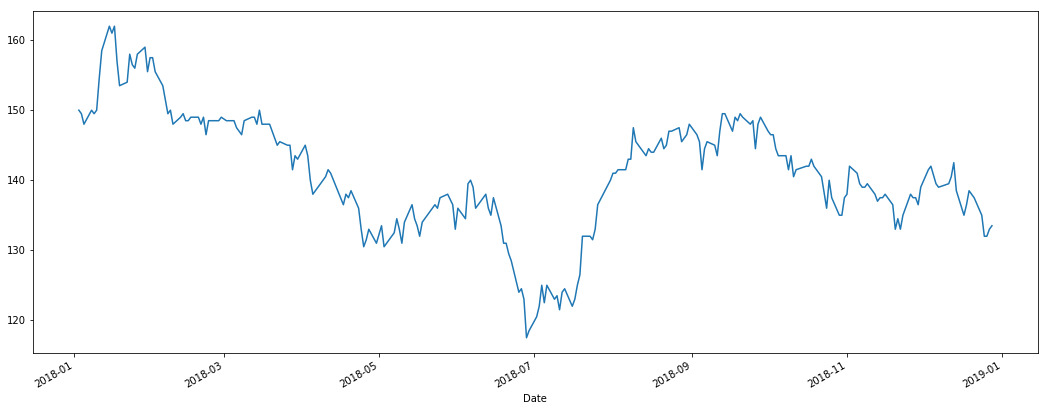

In [9]:
_ = daily_close_px['scb'].plot(figsize=(18,7))

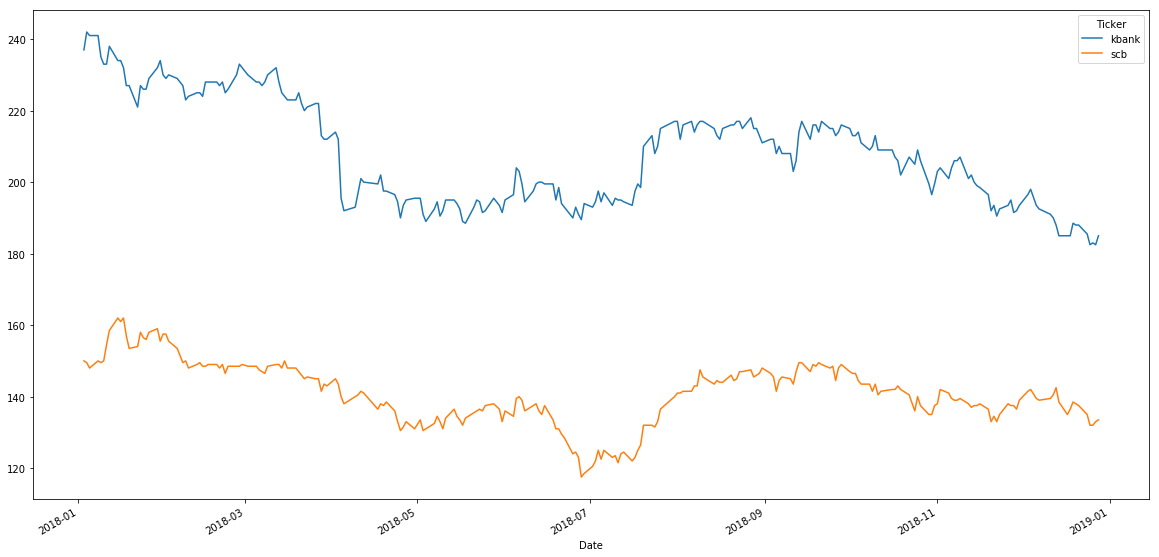

In [19]:
_ = daily_close_px[['kbank','scb']].plot(figsize=(20,10))